In [50]:
from unet_model import simple_unet_model
from keras.utils import normalize
import os
import cv2
from PIL import Image
import numpy as np 
from matplotlib import pyplot as plt

In [2]:
image_directory = 'Code/DS/train/images/'
mask_directory = 'Code/DS/train/masks/'

In [3]:
SIZE =256
image_dataset = []
mask_dataset=[]

In [4]:
images = os.listdir(image_directory)
images

['3.tif',
 '1.tif',
 '1.png',
 '5.tif',
 '3.png',
 '4.tif',
 '2.png',
 '4.png',
 '5.png',
 '2.tif']

In [5]:
for i , image_name in enumerate(images):
    if(image_name.split('.')[1] =='png'):
        image = cv2.imread(image_directory + image_name, 0)
        image = Image.fromarray(image)
        image = image.resize((SIZE, SIZE))
        image_dataset.append(np.array(image))

In [6]:
image_dataset

[array([[115, 124, 131, ..., 166, 180, 187],
        [102, 108, 120, ..., 161, 178, 185],
        [ 98, 110, 122, ..., 150, 176, 189],
        ...,
        [ 99,  99,  98, ..., 114, 162, 156],
        [104, 115, 116, ..., 125, 161, 163],
        [134, 135, 140, ..., 117, 132, 146]], dtype=uint8),
 array([[129, 125, 115, ..., 168, 180, 182],
        [100, 106, 107, ..., 167, 176, 182],
        [106, 113, 108, ..., 169, 179, 186],
        ...,
        [100,  92,  95, ..., 119, 157, 155],
        [107, 118, 115, ..., 126, 159, 156],
        [132, 139, 147, ..., 118, 129, 140]], dtype=uint8),
 array([[115, 119, 122, ..., 167, 179, 185],
        [103, 104, 112, ..., 162, 176, 192],
        [ 96, 115, 114, ..., 160, 179, 190],
        ...,
        [102, 100,  98, ..., 118, 159, 160],
        [110, 113, 115, ..., 128, 161, 164],
        [131, 143, 143, ..., 115, 133, 150]], dtype=uint8),
 array([[132, 125, 115, ..., 167, 177, 177],
        [108, 104, 104, ..., 169, 168, 182],
        [115, 12

In [7]:
masks = os.listdir(mask_directory)
masks

['gt2.tif',
 'gt3.tif',
 'gt1.png',
 'gt1.tif',
 'gt2.png',
 'gt5.png',
 'gt3.png',
 'gt4.png',
 'gt4.tif',
 'gt5.tif']

In [8]:
for i , image_name in enumerate(masks):
    if(image_name.split('.')[1] =='png'):
        image = cv2.imread(mask_directory + image_name, 0)
        image = Image.fromarray(image)
        image = image.resize((SIZE, SIZE))
        mask_dataset.append(np.array(image))

In [9]:
mask_dataset

[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0

In [10]:
image_dataset = np.expand_dims(normalize(np.array(image_dataset), axis=1), 3)
mask_dataset = np.expand_dims((np.array(mask_dataset)), 3)/255.

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_dataset, 
                                                    mask_dataset, test_size=0.1, random_state=42)

In [12]:
IMG_HEIGHT= image_dataset.shape[1]
IMG_WIDTH = image_dataset.shape[2]
IMG_CHANNELS = image_dataset.shape[3]

In [13]:
def get_model():
    return simple_unet_model(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)

In [14]:
model = get_model()

2023-09-03 18:16:19.706761: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.10/dist-packages/cv2/../../../../lib:/opt/ros/rolling/opt/rviz_ogre_vendor/lib:/opt/ros/rolling/lib/x86_64-linux-gnu:/opt/ros/rolling/lib
2023-09-03 18:16:19.707815: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-09-03 18:16:19.707900: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mhmud): /proc/driver/nvidia/version does not exist
2023-09-03 18:16:19.709388: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operat

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 16  160         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 dropout (Dropout)              (None, 256, 256, 16  0           ['conv2d[0][0]']                 
                                )                                                             

                                                                                                  
 dropout_7 (Dropout)            (None, 128, 128, 32  0           ['conv2d_14[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_15 (Conv2D)             (None, 128, 128, 32  9248        ['dropout_7[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_transpose_3 (Conv2DTran  (None, 256, 256, 16  2064       ['conv2d_15[0][0]']              
 spose)                         )                                                                 
                                                                                                  
 concatena

In [15]:
history = model.fit(X_train, y_train, batch_size=16, verbose=1, epochs=5, validation_data=(X_test, y_test), shuffle=False)

Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 0.6795 - accuracy: 0.6406 - val_loss: 0.5700 - val_accuracy: 0.8115
Epoch 2/5
1/1 [==============================] - 1s 1s/step - loss: 0.5109 - accuracy: 0.7887 - val_loss: 0.5480 - val_accuracy: 0.8920
Epoch 3/5
1/1 [==============================] - 1s 1s/step - loss: 1.0327 - accuracy: 0.8653 - val_loss: 0.4318 - val_accuracy: 0.8946
Epoch 4/5
1/1 [==============================] - 1s 1s/step - loss: 0.3763 - accuracy: 0.8834 - val_loss: 0.5686 - val_accuracy: 0.8952
Epoch 5/5
1/1 [==============================] - 1s 1s/step - loss: 0.5022 - accuracy: 0.8901 - val_loss: 0.5935 - val_accuracy: 0.8960


In [16]:
_, acc = model.evaluate(X_test, y_test)
acc

1/1 [==============================] - 0s 74ms/step - loss: 0.5935 - accuracy: 0.8960


0.8960113525390625

In [42]:
y_pred = model.predict(X_test)
y_pred_th = y_pred > 0.5
y_pred_th

1/1 [==============================] - 0s 85ms/step


array([[[[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]],

        [[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]],

        [[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]],

        ...,

        [[ True],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]],

        [[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]],

        [[ True],
         [ True],
         [False],
         ...,
         [False],
         [False],
         [False]]]])

In [41]:
intersection = np.logical_and(y_test, y_pred_th)
union = np.logical_or(y_test, y_pred_th)
mean_iou = np.sum(intersection)/np.sum(union)
mean_iou

0.00029342723004694836

In [48]:
import random 
import tensorflow as tf

def display(display_list):
    title = ['Input_image', 'True_mask', 'Predicted_mask']
    plt.figure(figsize=(15, 15))
    for i in range(len(display_list)):
        im = tf.keras.utils.array_to_img(display_list[i])
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(im, cmap='gray')
        plt.axis('off')
    plt.show()
    

1/1 [==============================] - 0s 86ms/step


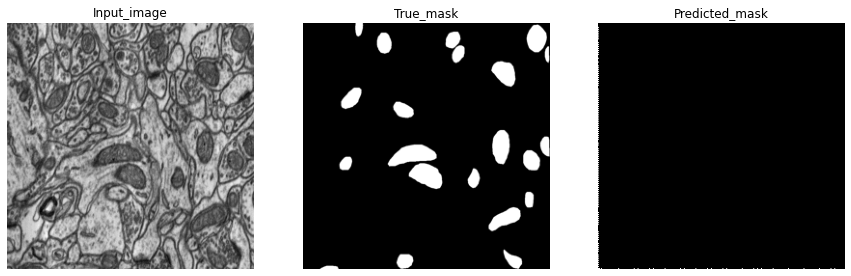

In [49]:
i = random.randint(0, len(X_train))
sample_image = X_train[i]
sample_mask = y_train[i]

prediction = model.predict(sample_image[tf.newaxis, ...])[0]
predicted_mask = (prediction > 0.5).astype(np.uint8)
display([sample_image, sample_mask, predicted_mask])
